In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [26]:
data.duplicated().sum()

1

In [27]:
data["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [30]:
x = (x - x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

array([[0.43759398, 1.        , 0.25233645, ..., 0.30855019, 0.        ,
        0.        ],
       [0.47518797, 0.80178174, 0.33333333, ..., 0.22304833, 0.        ,
        0.        ],
       [0.42105263, 0.79064588, 0.3894081 , ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.54586466, 0.        , 0.53894081, ..., 0.27973978, 0.52063492,
        0.        ],
       [0.54887218, 0.        , 0.51401869, ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.52631579, 0.        , 0.5576324 , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=19)

In [37]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)

0.676923076923077

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.65      0.75      0.70        20
           2       0.67      0.64      0.65        22
           3       0.25      0.25      0.25         4
           5       0.67      0.57      0.62         7
           6       1.00      0.50      0.67         4
           7       0.89      1.00      0.94         8

    accuracy                           0.68        65
   macro avg       0.69      0.62      0.64        65
weighted avg       0.68      0.68      0.67        65



# VISUALIZING THE CV RESULT

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv=10)
    k_scores.append(scores.mean())
    print("k value = ",k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))


k value =  1
              precision    recall  f1-score   support

           1       0.65      0.75      0.70        20
           2       0.67      0.64      0.65        22
           3       0.25      0.25      0.25         4
           5       0.67      0.57      0.62         7
           6       1.00      0.50      0.67         4
           7       0.89      1.00      0.94         8

    accuracy                           0.68        65
   macro avg       0.69      0.62      0.64        65
weighted avg       0.68      0.68      0.67        65

k value =  3
              precision    recall  f1-score   support

           1       0.71      0.75      0.73        20
           2       0.63      0.77      0.69        22
           3       0.00      0.00      0.00         4
           5       0.67      0.29      0.40         7
           6       1.00      0.50      0.67         4
           7       0.80      1.00      0.89         8

    accuracy                           0.68        

k value =  33
              precision    recall  f1-score   support

           1       0.50      0.75      0.60        20
           2       0.61      0.64      0.62        22
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         4
           7       0.67      1.00      0.80         8

    accuracy                           0.57        65
   macro avg       0.30      0.40      0.34        65
weighted avg       0.44      0.57      0.49        65

k value =  35
              precision    recall  f1-score   support

           1       0.53      0.80      0.64        20
           2       0.68      0.68      0.68        22
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         4
           7       0.62      1.00      0.76         8

    accuracy                           0.60      

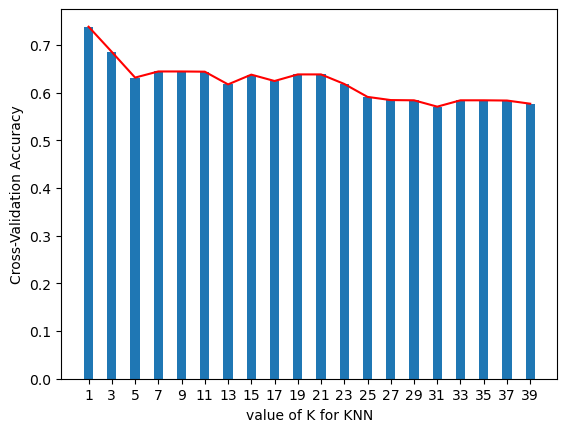

In [41]:
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color = "RED")
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.show()

In [42]:
np.argmax(k_scores)

0

In [43]:
k_range[0]

1

In [45]:
k_scores[1]

0.6852380952380953

In [46]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.65      0.75      0.70        20
           2       0.67      0.64      0.65        22
           3       0.25      0.25      0.25         4
           5       0.67      0.57      0.62         7
           6       1.00      0.50      0.67         4
           7       0.89      1.00      0.94         8

    accuracy                           0.68        65
   macro avg       0.69      0.62      0.64        65
weighted avg       0.68      0.68      0.67        65

